# Double pendulum using Lagrange's equation

In [7]:
%matplotlib inline

In [8]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt
from IPython.display import Image

In [9]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/7/78/Double-Pendulum.svg')

We first express Cartesian coordinates and its time derivative by the generalized coordinates $\theta_1$ and $\theta_2$:
\begin{align*}
  &x_1 = L_1 \sin(\theta_{1}) \\
  &x_2 = L_1 \sin(\theta_{1}) + L_2 \sin(\theta_{2}) \\
\end{align*}

\begin{align*}
  &y_1 = -L_1 \cos(\theta_{1}) \\
  &y_2 = -L_1 \cos(\theta_{1}) - L_2 \cos(\theta_{2}) \\
\end{align*}

\begin{align*}
  &\dot x_1 = L_1 \dot \theta_1 \cos(\theta_{1}) \\
  &\dot x_2 = L_1 \dot \theta_1 \cos(\theta_{1}) + L_2 \dot \theta_2 \cos(\theta_{2}) \\
\end{align*}

\begin{align*}
  &\dot y_1 = L_1 \dot \theta_1\sin(\theta_{1}) \\
  &\dot y_2 = L_1 \dot \theta_1\sin(\theta_{1}) + L_2 \dot \theta_2\sin(\theta_{2}) \\
\end{align*}

Then the kinetic energy and the potential energy is:
\begin{align*}
  T=0.5 m_1 L_1^2 \dot\theta_1^2+0.5m_2[L_1^2 \dot\theta_1^2+L_2^2 \dot\theta_2^2+2L_1L_2\cos(\theta_1-\theta_2)\dot\theta_1^2\dot\theta_1^2]
\end{align*}
\begin{align*}
        U=-(m_1+m_2)L_1g\cos{\theta_1} m_2L_2g\cos{\theta_2}\\
 \end{align*}

The Lagrange: $ \begin{align}\mathcal{L}&= T-U \\ 
is:
    & =\frac12(m_1+m_2){L_1}^2 \dot\theta_{1}^2 + m_2 L_1 L_2 \dot\theta_{1} \dot\theta_{2} \cos(\theta_{1} - \theta_{2})
    + \frac12 m_2{L_2}^2 \dot\theta_{2}^2  + (m_1+m_2) g {L_1} \cos \theta_{1} + m_2 g {L_2} \cos \theta_{2} 
 \end{align}$
 
By applying Euler-Lagrange equations $\frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\theta_{1}} = \frac{\partial\mathcal L}{\partial\theta_{1}}$ and $\frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\theta_{1}} = \frac{\partial\mathcal L}{\partial\theta_{1}}$, we get:
 
$\begin{align}
    (m_1 + m_2) L_1 \ddot\theta_{1} + m_2  L_2 \ddot\theta_{2} \cos(\theta_{1} - \theta_{2}) + m_2  L_2 \dot\theta_{2}^2 \sin(\theta_{1} - \theta_{2})+(m_1 + m_2) g  \sin(\theta_1)=0\\
   m_2 L_2 \ddot\theta_{2} + m_2 L_1  \ddot\theta_{2} \cos(\theta_{1} - \theta_{2}) - m_2 L_1  \dot\theta_{1}^2 \sin(\theta_{1} - \theta_{2})+m_2 g  \sin(\theta_2)=0
\end{align}$

Let $\dot\theta_1=z_1$ and $\dot\theta_2=z_2$. After some rearranging, we get:

$\begin{align} 
\dot{z_1}  &= \frac{m_2 g \sin{\theta_2} \cos(\theta_1-\theta_2) - m_2 \sin(\theta_1-\theta_2) (L_1z_1^2 \cos(\theta_1-\theta_2)  + L_2 z_2^2) - (m_1+m_2)g \sin{\theta_1}}{L_1 (m_1+m_2 \sin^2(\theta_1-\theta_2)) }
\end{align}$

$\begin{align} 
\dot{z_2} &= \frac{(m_1+m_2) (L_1 z_1^2 \sin(\theta_1-\theta_2) - g \sin{\theta_2} + g \sin{\theta_1} \cos(\theta_1-\theta_2)) + m_2 L_2 z_2^2 \cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)}{L_2 (m_1+m_2 \sin^2(\theta_1-\theta_2)) }
\end{align}$

In [27]:
class DoublePendulum():
    """
    DoublePendulum class implements the parameters and Lagrange's equations for 
     a simple double pendulum (no driving or damping).
     
    Parameters
    ----------
    L1: float
        length of the first pendulum
    L2: float
        length of the second pendulum
    g : float
        gravitational acceleration at the earth's surface
    mn : float
        mass of pendulum bob, where n is the pendulum bob number

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., mass1=1., mass2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = mass1
        self.m2 = mass2
    
    def dy_dt(self, t, y):
   
        theta1, z1, theta2, z2 = y
        
        c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)
        denom = (self.m1 +self.m2 * s**2)
        
        theta1_dot = z1
        z1_dot = ( self.m2 * self.g * np.sin(theta2) * c\
                    - self.m2 * s * (self.L1 * z1**2 *c + self.L2 * z2**2) \
                    - (self.m1 +self.m2) * self.g *np.sin(theta1) ) \
                    / self.L1 / denom
        theta2_dot = z2
        z2_dot = ( (self.m1 +self.m2) * (self.L1 * z1**2 * s \
                    - self.g * np.sin(theta2) + self.g * np.sin(theta1) * c)
                    + self.m2 *self.L2 * z2**2 * s * c ) \
                    / self.L2 / denom
        return theta1_dot, z1_dot, theta2_dot, z2_dot
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0]
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y

        return theta1, theta1_dot, theta2, theta2_dot
    
    def calc_E(y):
        
        th1, th1d, th2, th2d = y.T
        V = -(m1+m2)*L1*g*mnp.cos(th1)-m2*L2*g*np.cos(th2)
        T = 0.5*m1*(L1*th1d)**2 +0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 +
                2*L1*L2*th1d*th2d*np.cos(th1-th2))
        return T + V

In [106]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [107]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [110]:
# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')


# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
mass1 = 1.
mass2 = 1.
g = 1.

# Instantiate a double pendulum 
dp1 = DoublePendulum(L1=L1, L2=L2, mass1=mass1, mass2=mass2,g=g)

# Initial condition I

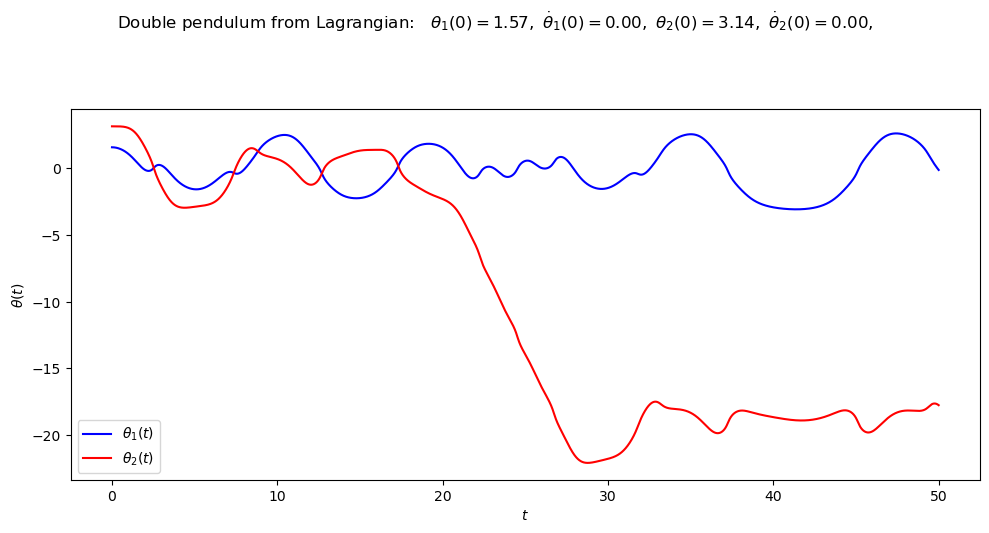

In [111]:
# initial conditions
theta1_0 = np.pi/2
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$',  
            ax=ax_a)   
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$',  
            ax=ax_a) 
                              
fig.tight_layout()
fig.savefig('double_pendulum_1.png', bbox_inches='tight')  


# Initial condition II

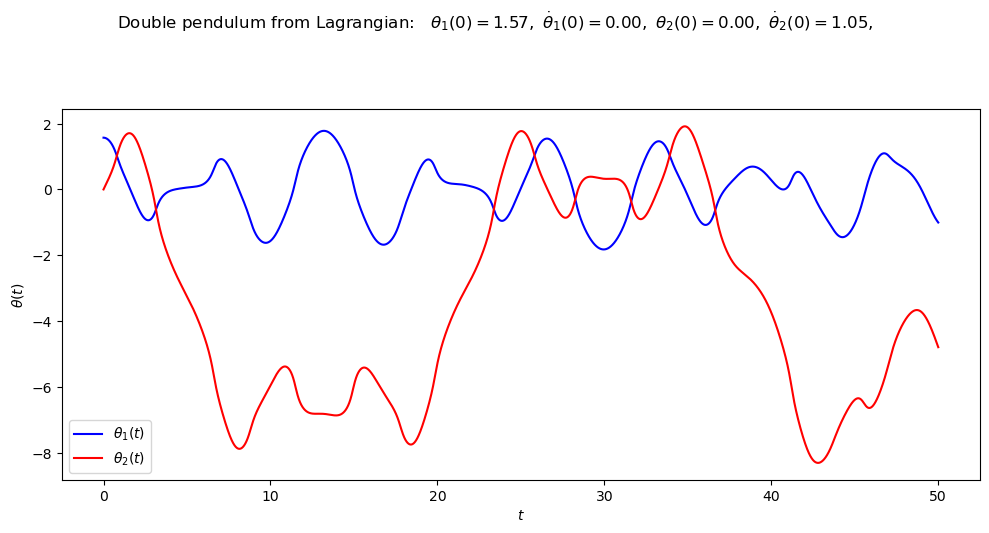

In [112]:
# initial conditions
theta1_0 = np.pi/2
theta1_dot_0 = 0.
theta2_0 = 0
theta2_dot_0 = np.pi/3

theta1, theta1_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$',  
            ax=ax_a)   
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$',  
            ax=ax_a) 
                              
fig.tight_layout()
fig.savefig('double_pendulum_2.png', bbox_inches='tight')  


# $\triangle \theta$ and chaos

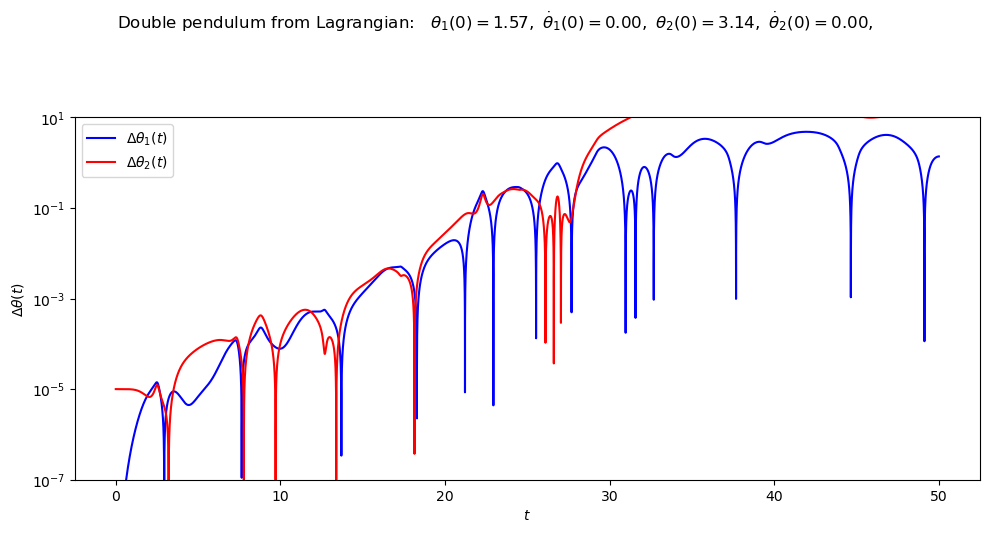

In [113]:
# both plots: same initial conditions
theta1_0 = np.pi/2
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 =  0

theta1, theta1_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
theta1b, theta1b_dot, theta2b, theta2b_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0-0.00001, theta2_dot_0)

delta_theta_vs_time_labels = (r'$t$', r'$\Delta\theta(t)$')

# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
     
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start : stop]-theta1b[start : stop]), 
            axis_labels=delta_theta_vs_time_labels, 
            color='blue', semilogy=True,
            label=r'$\Delta\theta_1(t)$',  
            ax=ax_a)   
plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start : stop]-theta2b[start : stop]), 
            axis_labels=delta_theta_vs_time_labels, 
            color='red', semilogy=True,
            label=r'$\Delta\theta_2(t)$',  
            ax=ax_a) 
ax_a.set_ylim(1.e-7,10.)
                              
fig.tight_layout()
fig.savefig('double_pendulum_3.png', bbox_inches='tight')  

The Red and Blue graph shows the value of $\Delta\theta_i$ with slightly different initial condition, see the value was close initially, the value is increasing linearly in a expontional graph, this means the value if extremely sensitive to initial conditions, which is a characteristic of chaotic motion.

# Animition

In [114]:
from matplotlib import animation, rc
from IPython.display import HTML

In [115]:
def xy_coords(x0, y0, theta, L):
    
    x = x0 + L * np.sin(theta)
    y = y0 - L * np.cos(theta)
    return x, y

In [92]:
%%capture
x_min = -3.2
x_max = -x_min
y_min = -3.2
y_max = -y_min

fig_anim = plt.figure(figsize=(5, 5), num='Double Pendulum')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

# By assigning the first return from plot to pt1_anim and the others,
# we can later change the values.
x0, y0 = 0., 0.
pt0_anim, = ax_anim.plot(x0, y0, 'o', markersize=6,
                        color='black')

x1, y1 = xy_coords(x0, y0, theta1[0], dp1.L1)
pt1_anim, = ax_anim.plot(x1, y1,
                         'o', markersize=12,
                         color='blue')
ln1_anim, = ax_anim.plot([x0, x1], [y0, y1], color='blue', lw=3)
x2, y2 = xy_coords(x1, y1, theta2[0], dp1.L2)
pt2_anim, = ax_anim.plot(x2, y2,
                         'o', markersize=12,
                         color='blue')
ln2_anim, = ax_anim.plot([x1, x2], [y1, y2], color='blue', lw=3)

x1b, y1b = xy_coords(x0, y0, theta1b[0], dp1.L1)
pt1b_anim, = ax_anim.plot(x1b, y1b,
                         'o', markersize=12,
                         color='red')
ln1b_anim, = ax_anim.plot([x0, x1b], [y0, y1b], color='red', lw=3)
x2b, y2b = xy_coords(x1b, y1b, theta2b[0], dp1.L2)
pt2b_anim, = ax_anim.plot(x2b, y2b,
                         'o', markersize=12,
                         color='red')
ln2b_anim, = ax_anim.plot([x1b, x2b], [y1b, y2b], color='red', lw=3)


ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()

In [93]:
def animate_pendulum(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    
    i_skip = 2 * i
    
    x0, y0 = 0., 0.
    pt0_anim.set_data(x0, y0)
    
    x1, y1 = xy_coords(x0, y0, theta1[i_skip], dp1.L1)
    pt1_anim.set_data(x1, y1)
    ln1_anim.set_data([x0, x1], [y0, y1])
    x2, y2 = xy_coords(x1, y1, theta2[i_skip], dp1.L2)
    pt2_anim.set_data(x2, y2)
    ln2_anim.set_data([x1, x2], [y1, y2])
    
    x1b, y1b = xy_coords(x0, y0, theta1b[i_skip], dp1.L1)
    pt1b_anim.set_data(x1b, y1b)
    ln1b_anim.set_data([x0, x1b], [y0, y1b])
    x2b, y2b = xy_coords(x1b, y1b, theta2b[i_skip], dp1.L2)
    pt2b_anim.set_data(x2b, y2b)
    ln2b_anim.set_data([x1b, x2b], [y1b, y2b])
    
    return (pt0_anim, pt1_anim, ln1_anim, pt2_anim, ln2_anim,
            pt1b_anim, ln1b_anim, pt2b_anim, ln2b_anim)

In [98]:
frame_interval = 2. # time between frames
frame_number = 1001 # number of frames to include (index of t_pts)
anim =animation.FuncAnimation(fig_anim,
                              animate_pendulum,
                              init_func=None,
                              frames=frame_number,
                              interval=frame_interval,
                              blit=True,
                              repeat=False)

In [99]:
HTML(anim.to_jshtml()) #animate